In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

imgname1 = 'TitechIMG.jpg'
imgname2 = 'TitechIMG_test01.jpg'

# 基于BFmatcher的SIFT实现

In [2]:
time_start=time.time()

sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = sift.detectAndCompute(img1,None)   #des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)#灰度处理图像
kp2, des2 = sift.detectAndCompute(img2,None)  #des是描述子

time_end=time.time()

print('time cost',time_end-time_start,'s')

time cost 0.11257123947143555 s


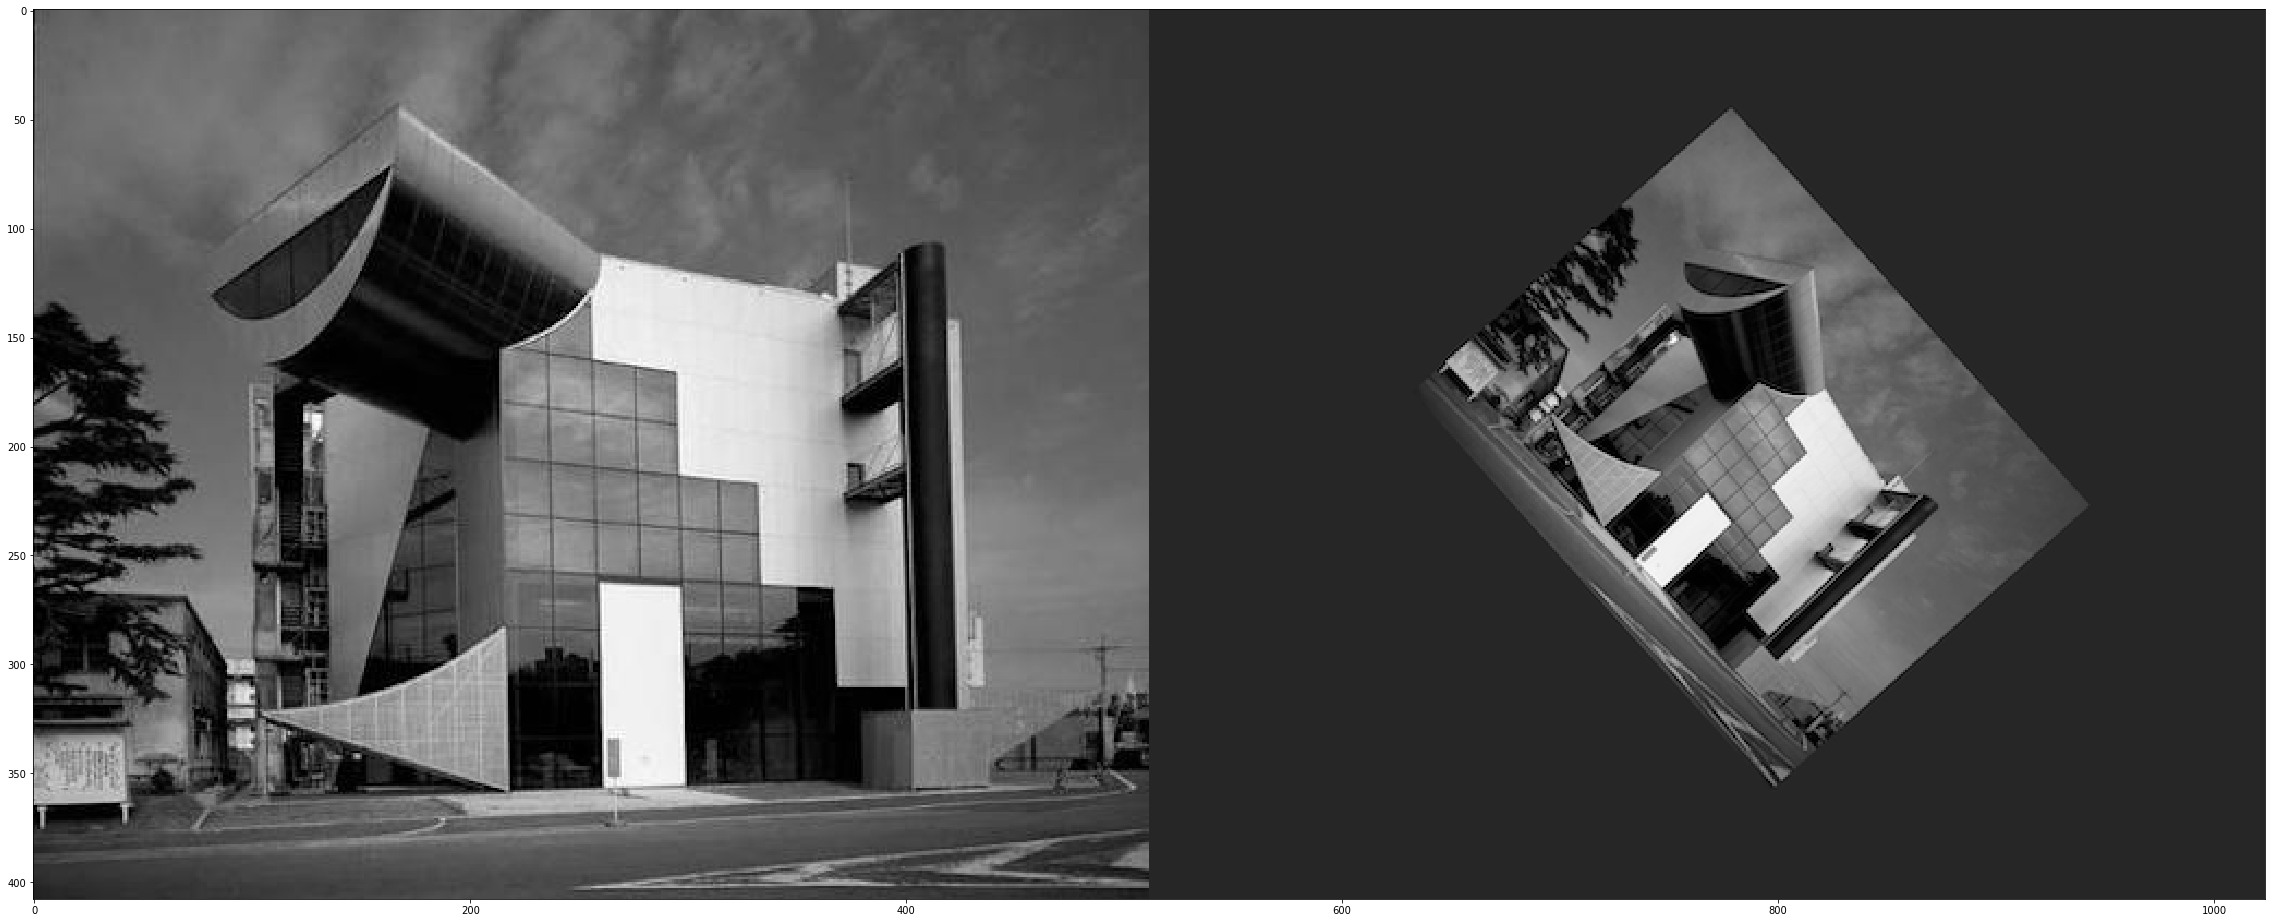

In [3]:
hmerge = np.hstack((gray1, gray2)) #水平拼接
plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow("gray", hmerge) #拼接显示为gray
# k = cv2.waitKey(5000) # waitkey代表读取键盘的输入，括号里的数字代表等待多长时间，单位ms。 0代表一直等待
# if k ==27:     # 键盘上Esc键的键值
#     cv2.destroyAllWindows() 

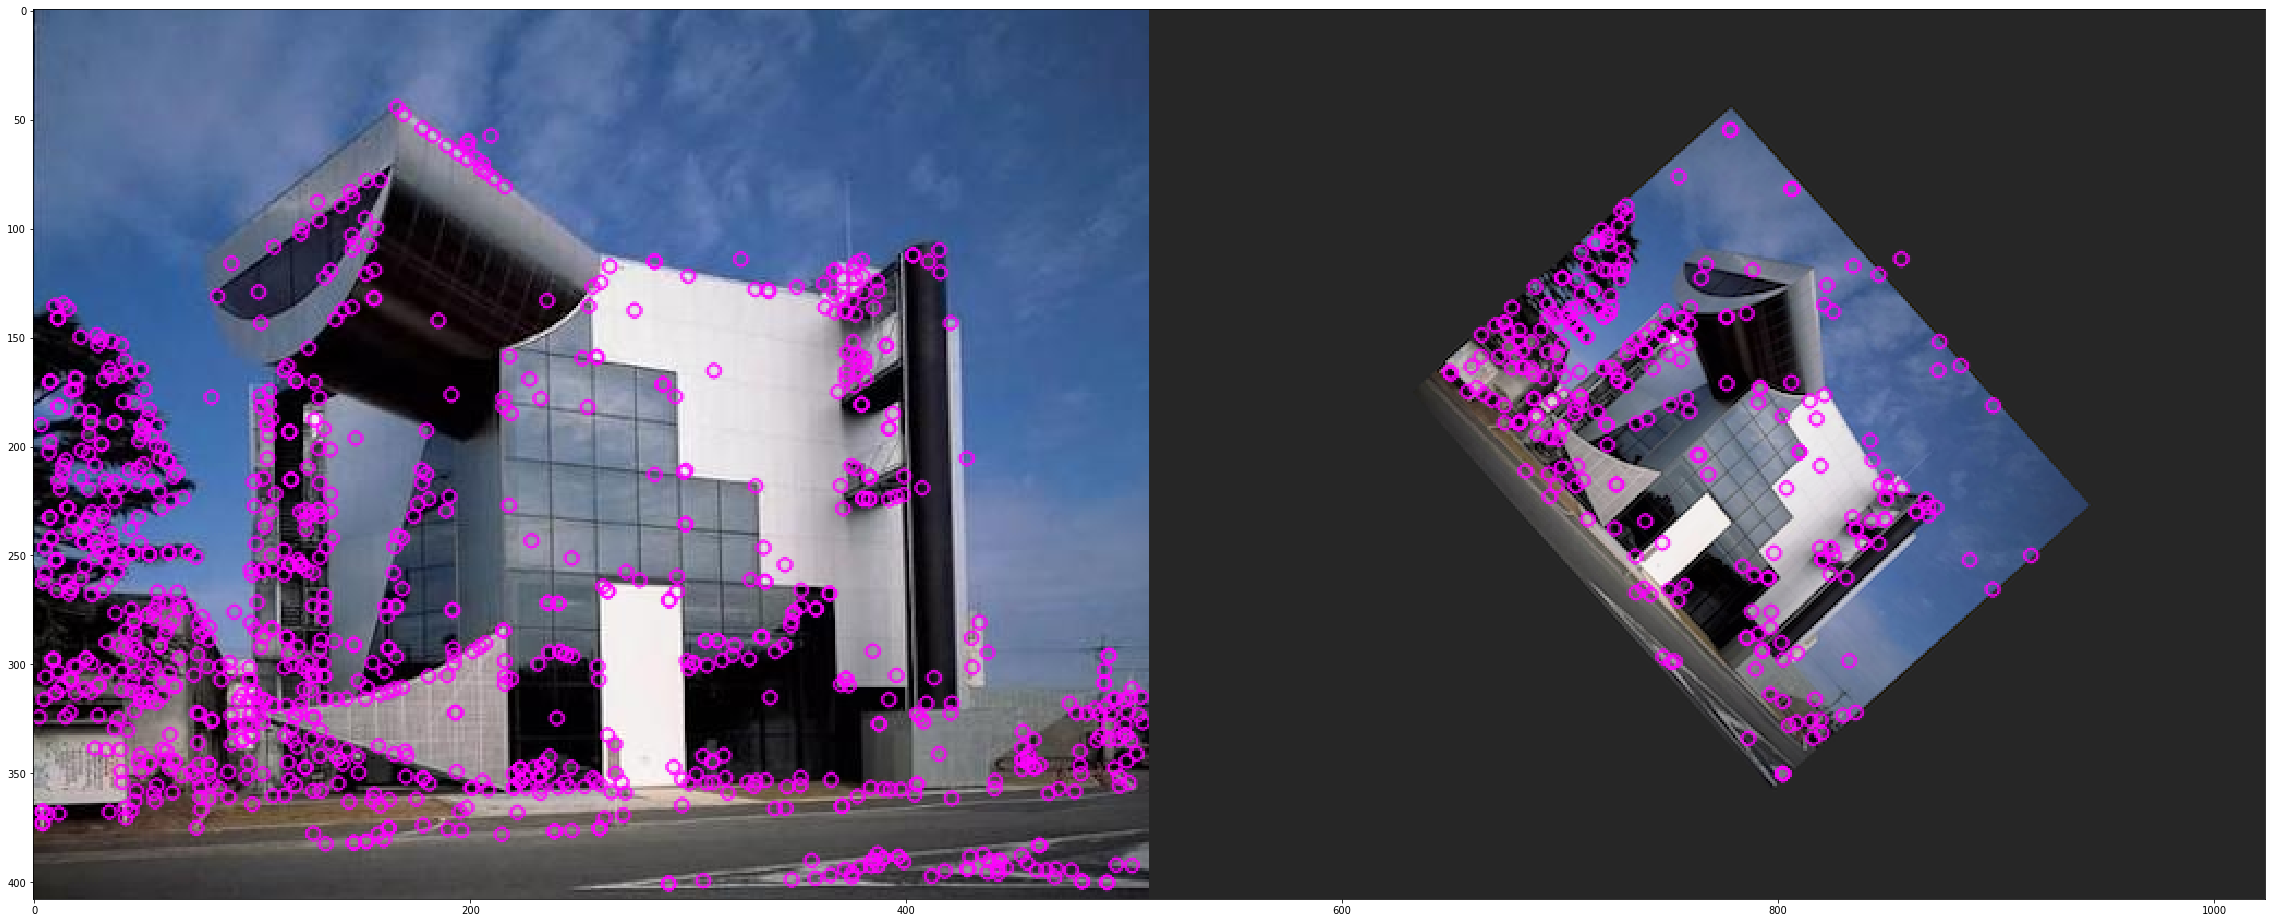

In [4]:
img3 = cv2.drawKeypoints(img1,kp1,gray1,color=(255,0,255)) #画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2,kp2,gray2,color=(255,0,255)) #画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4)) #水平拼接

# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
time_start=time.time()

# BFMatcher解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.04411482810974121 s


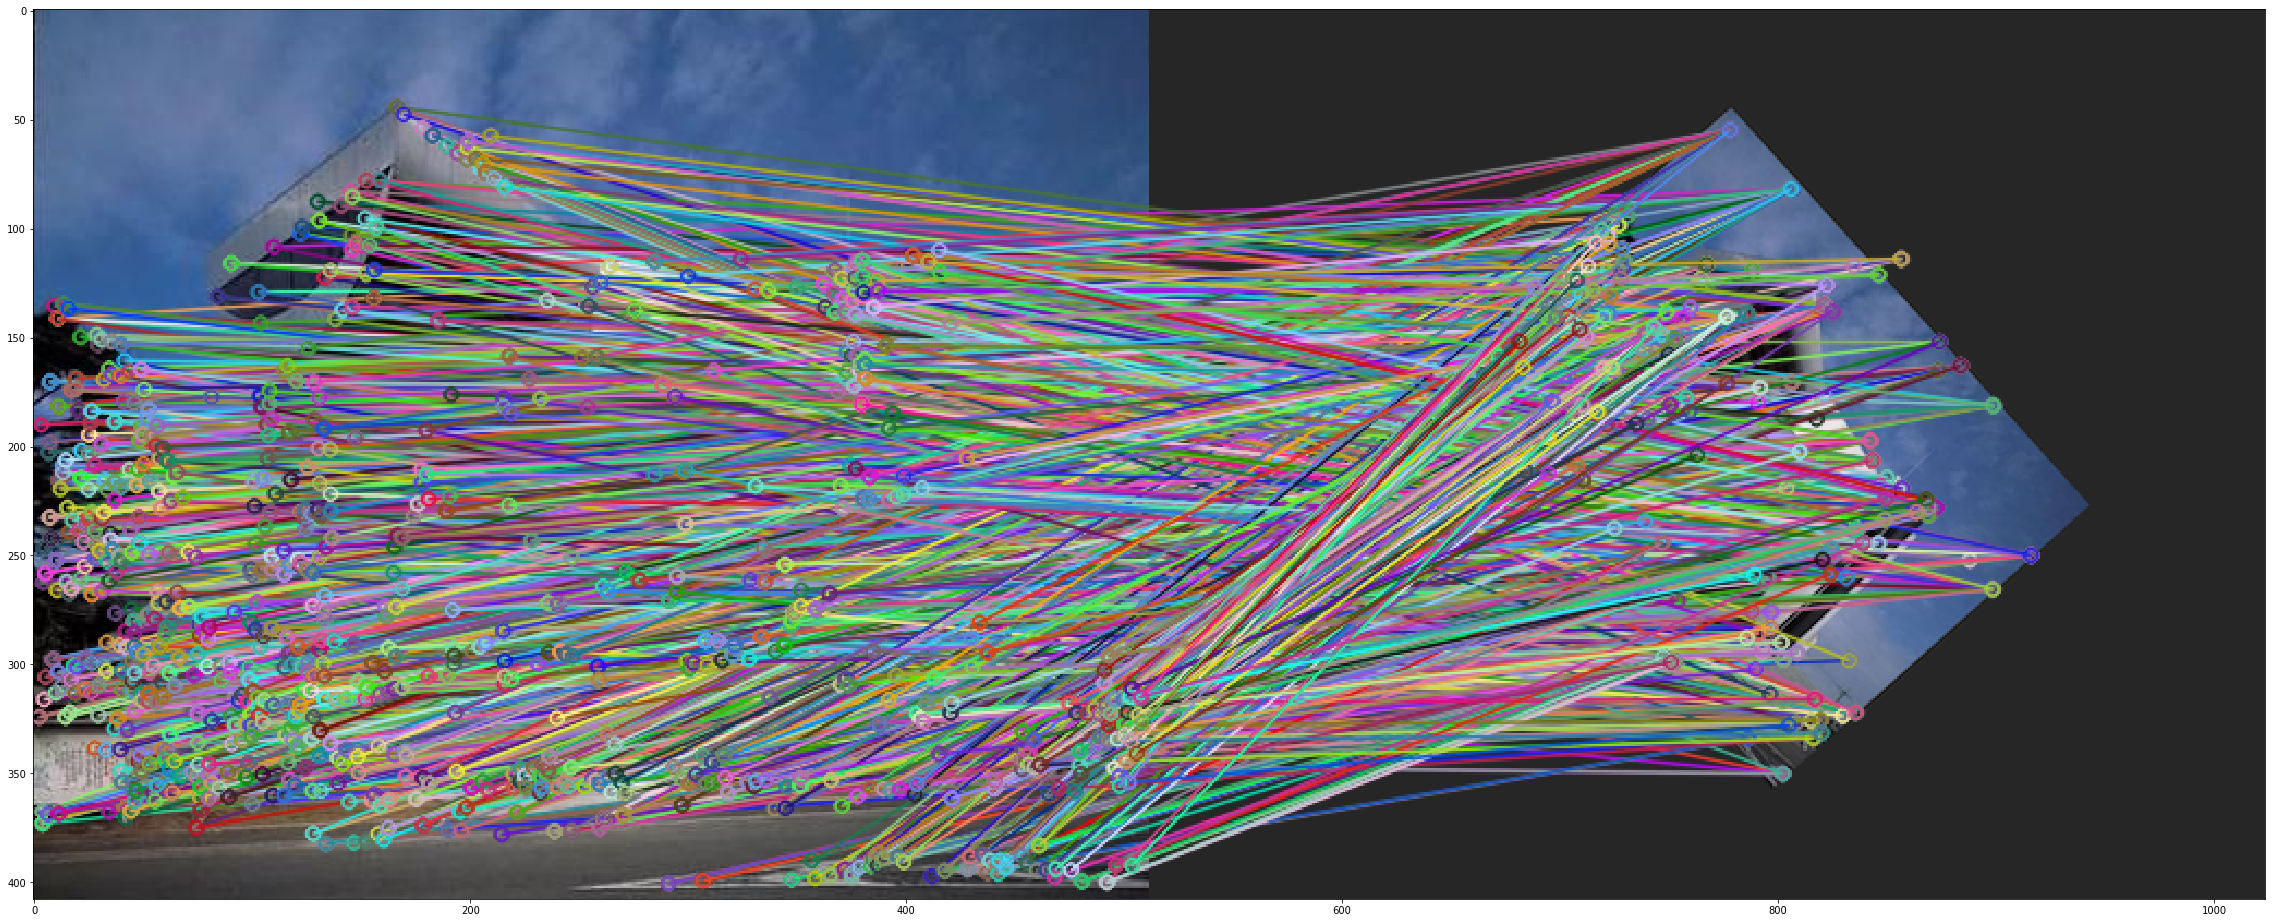

In [6]:
# cv2.imshow("BFmatch", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

# 基于FlannBasedMatcher的SIFT实现

In [7]:
time_start=time.time()
sift = cv2.xfeatures2d.SIFT_create()

# FLANN 参数设计
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = sift.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(img2,None)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.10702300071716309 s


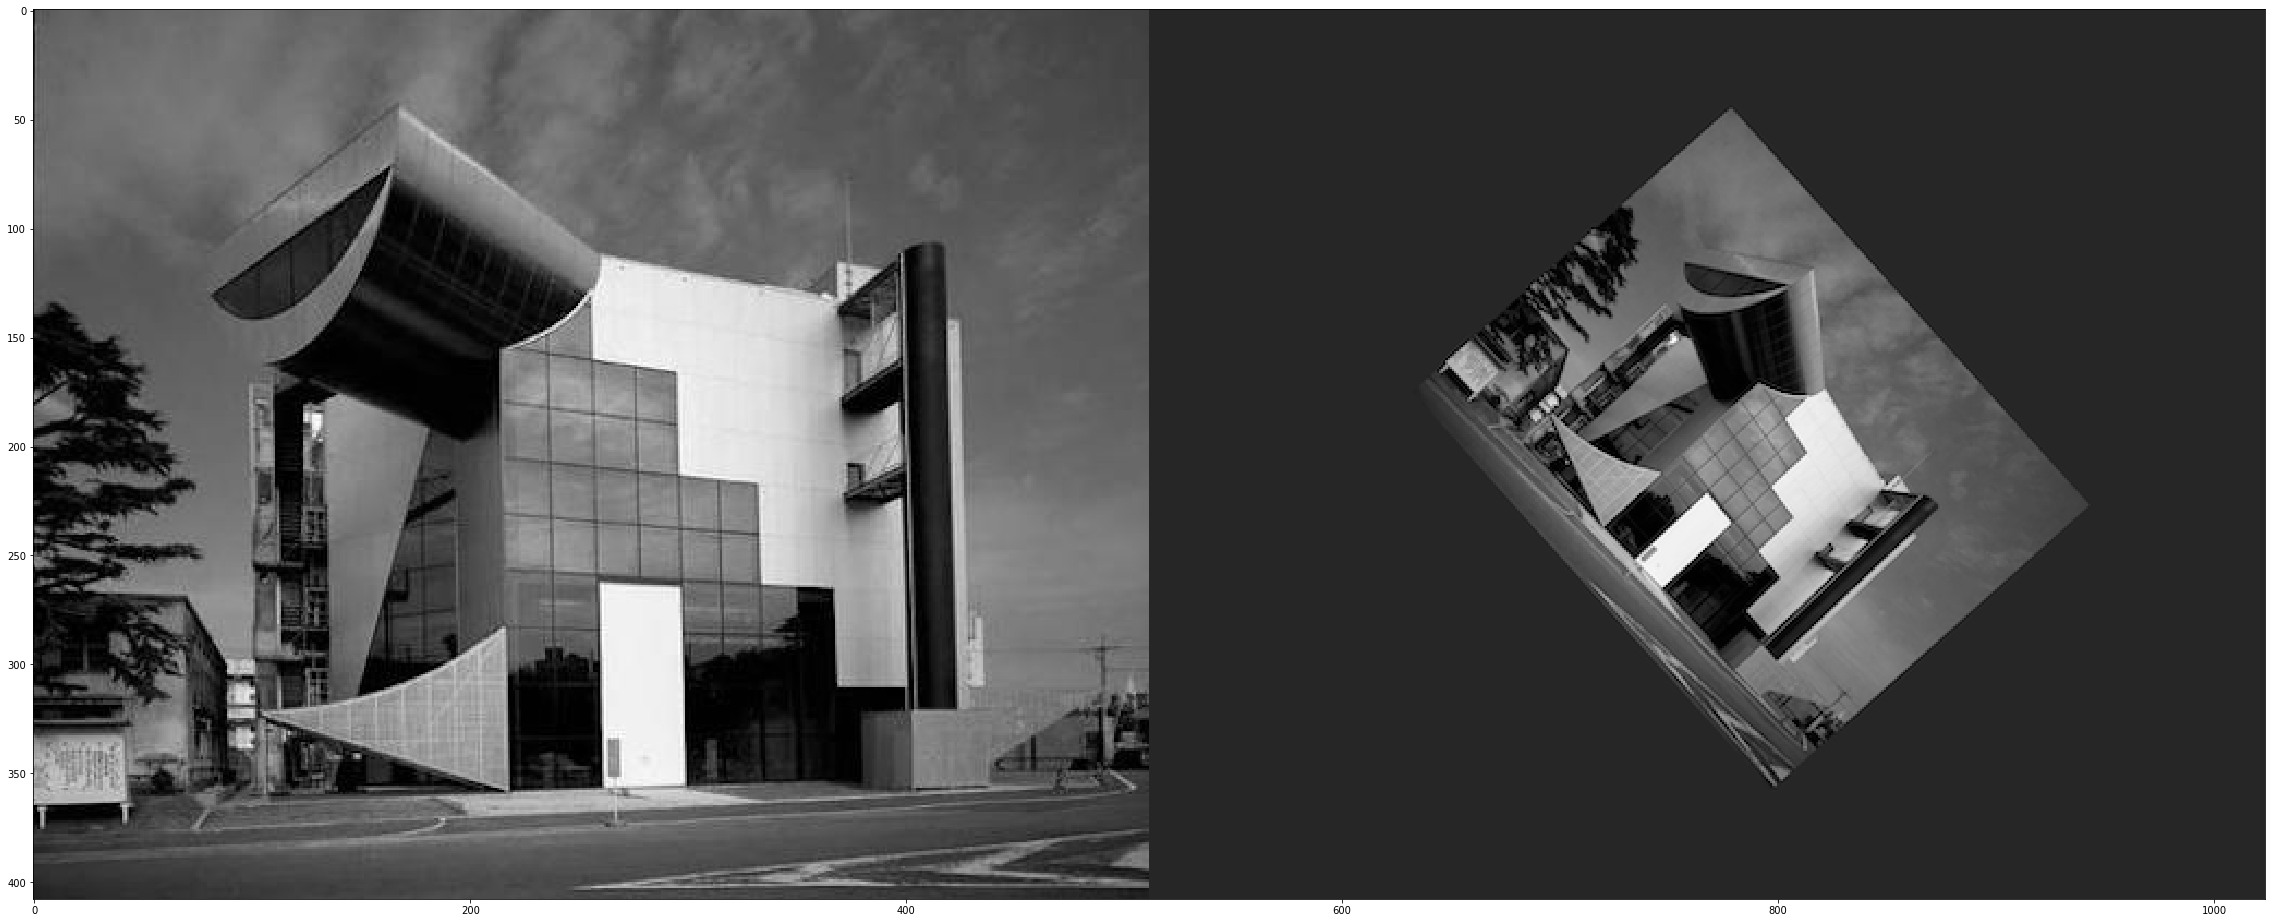

In [8]:
hmerge = np.hstack((gray1, gray2)) #水平拼接
# cv2.imshow("gray", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

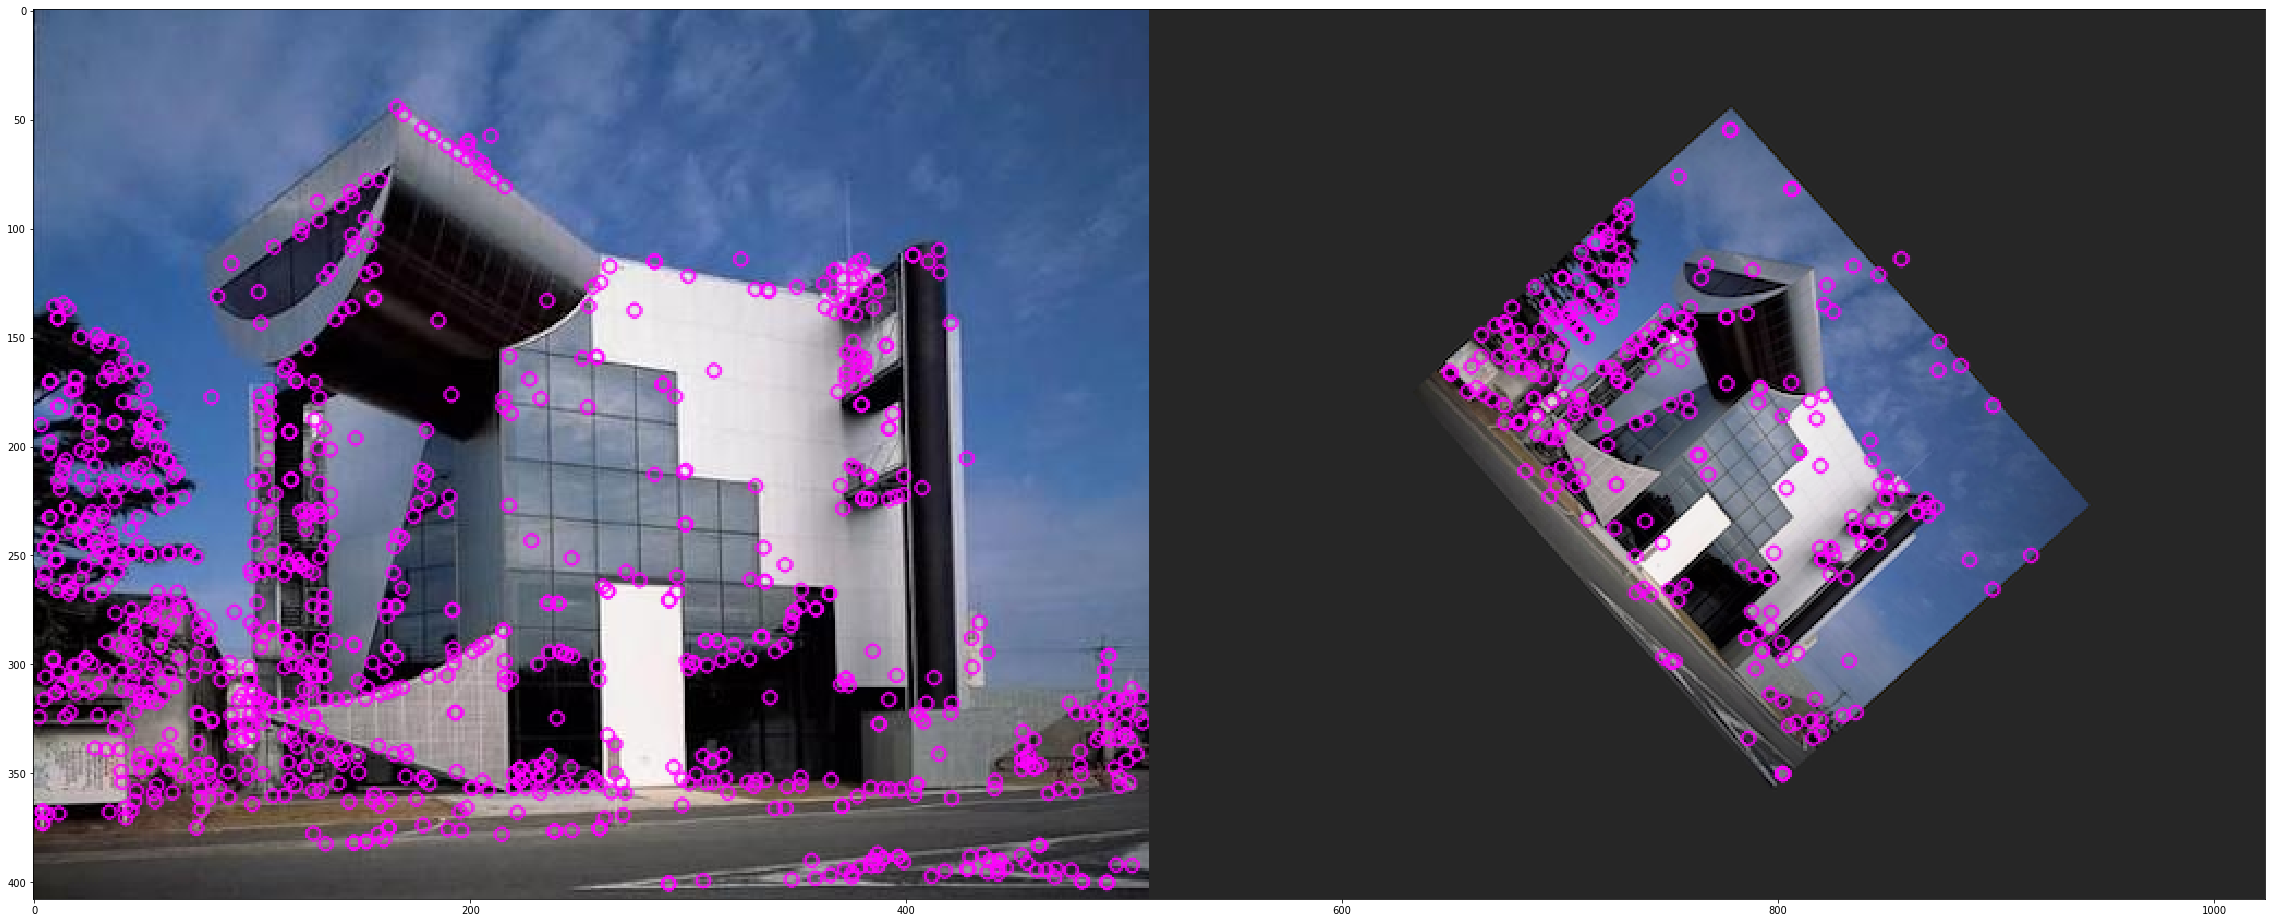

In [9]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
time_start=time.time()
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.06416893005371094 s


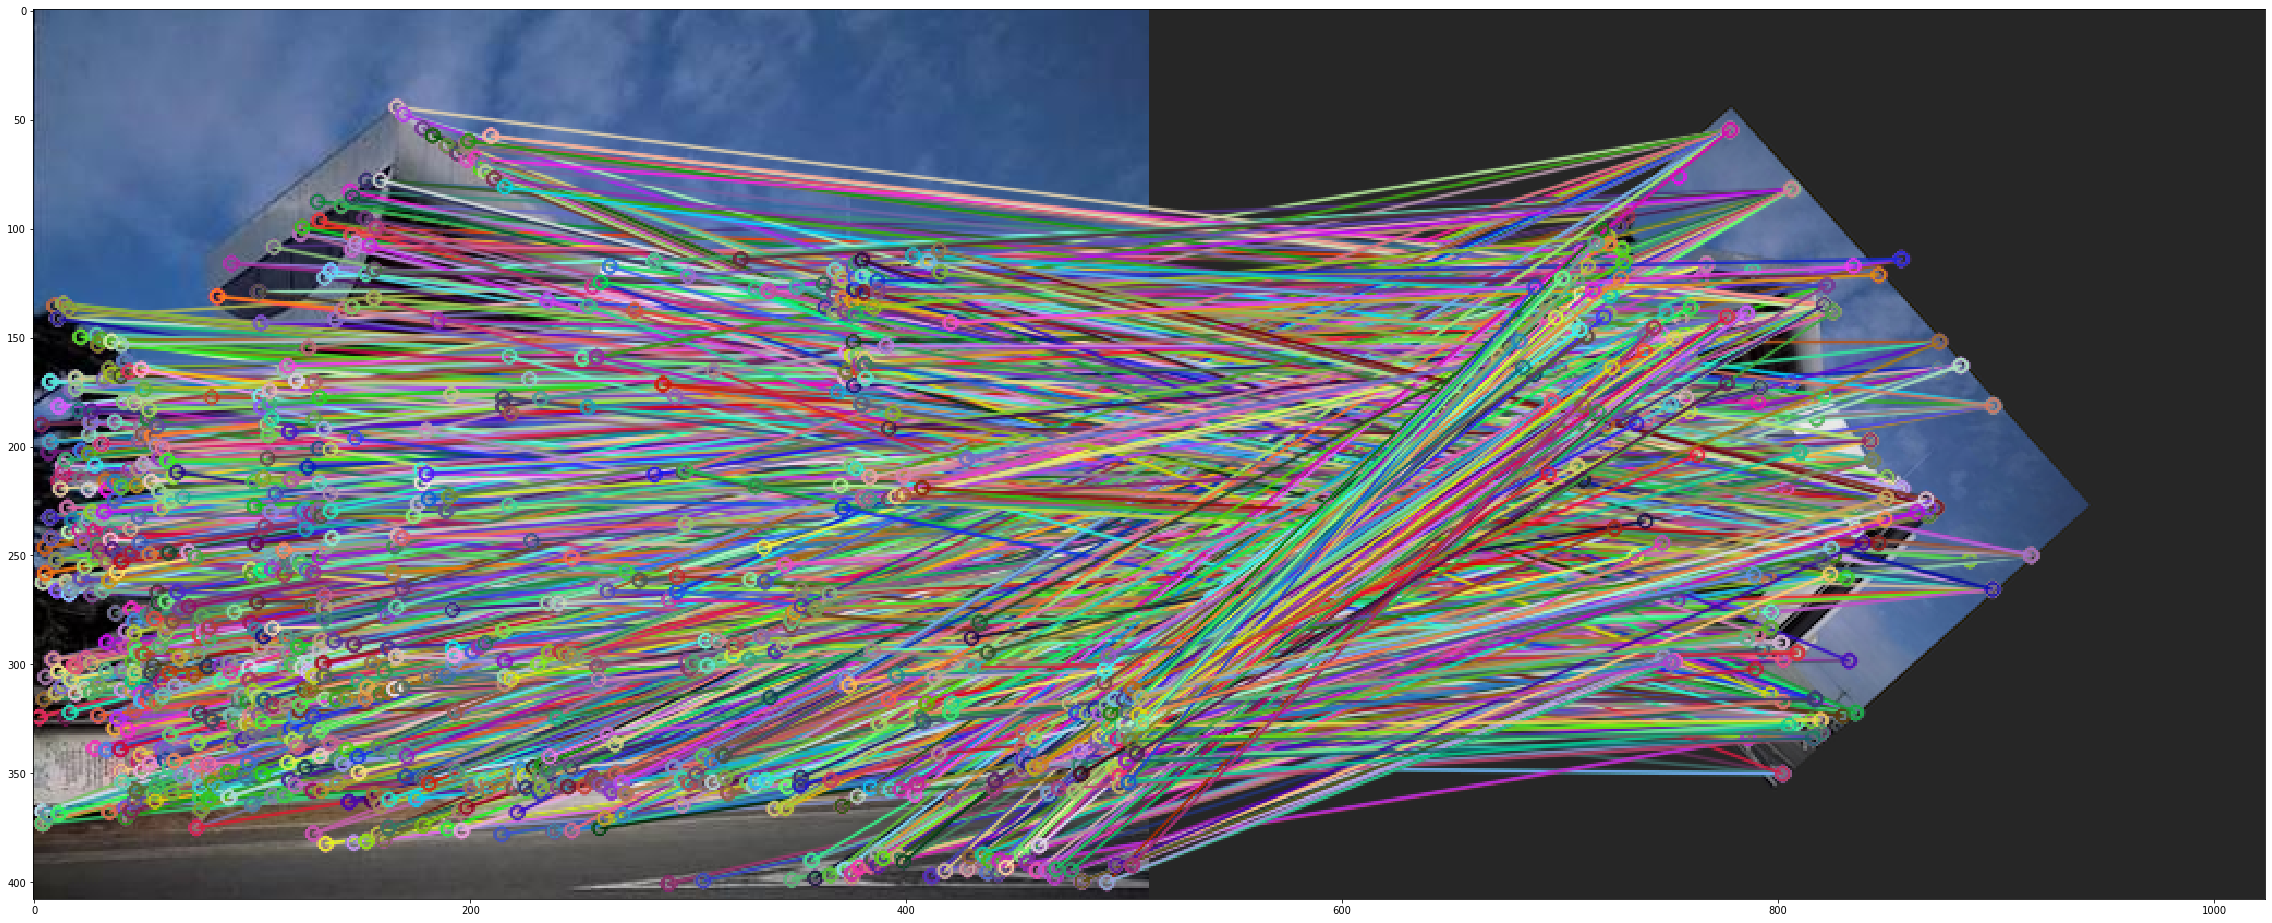

In [11]:
# cv2.imshow("FLANN", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

# 基于FlannBasedMatcher的SURF实现

In [6]:
surf = cv2.xfeatures2d.SURF_create()

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = surf.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = surf.detectAndCompute(img2,None)

hmerge = np.hstack((gray1, gray2)) #水平拼接
cv2.imshow("gray", hmerge) #拼接显示为gray
cv2.waitKey(0)

In [ ]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
cv2.imshow("point", hmerge) #拼接显示为gray
cv2.waitKey(0)

In [ ]:
matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])
img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow("SURF", img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 基于BFMatcher的ORB实现

In [17]:
time_start=time.time()

orb = cv2.ORB_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = orb.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = orb.detectAndCompute(img2,None)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.022288084030151367 s


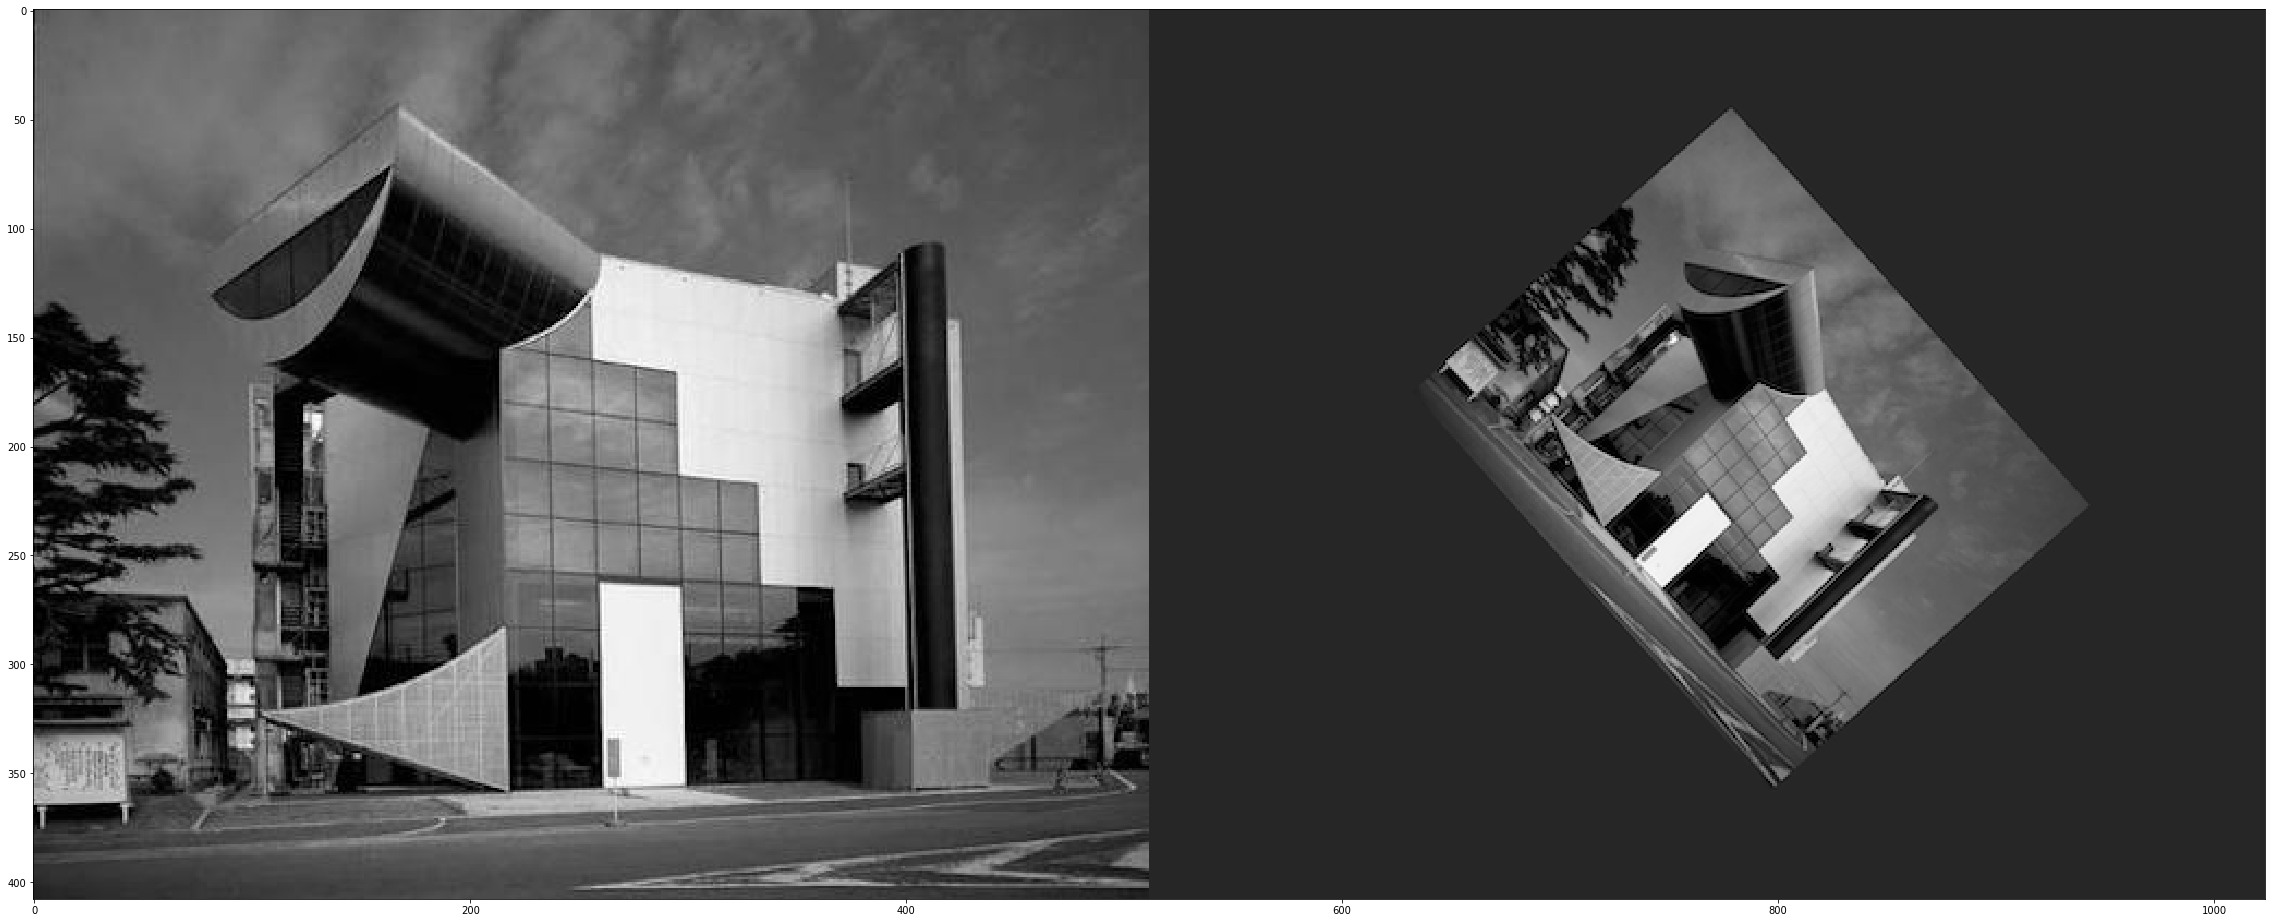

In [13]:
hmerge = np.hstack((gray1, gray2)) #水平拼接
# cv2.imshow("gray", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

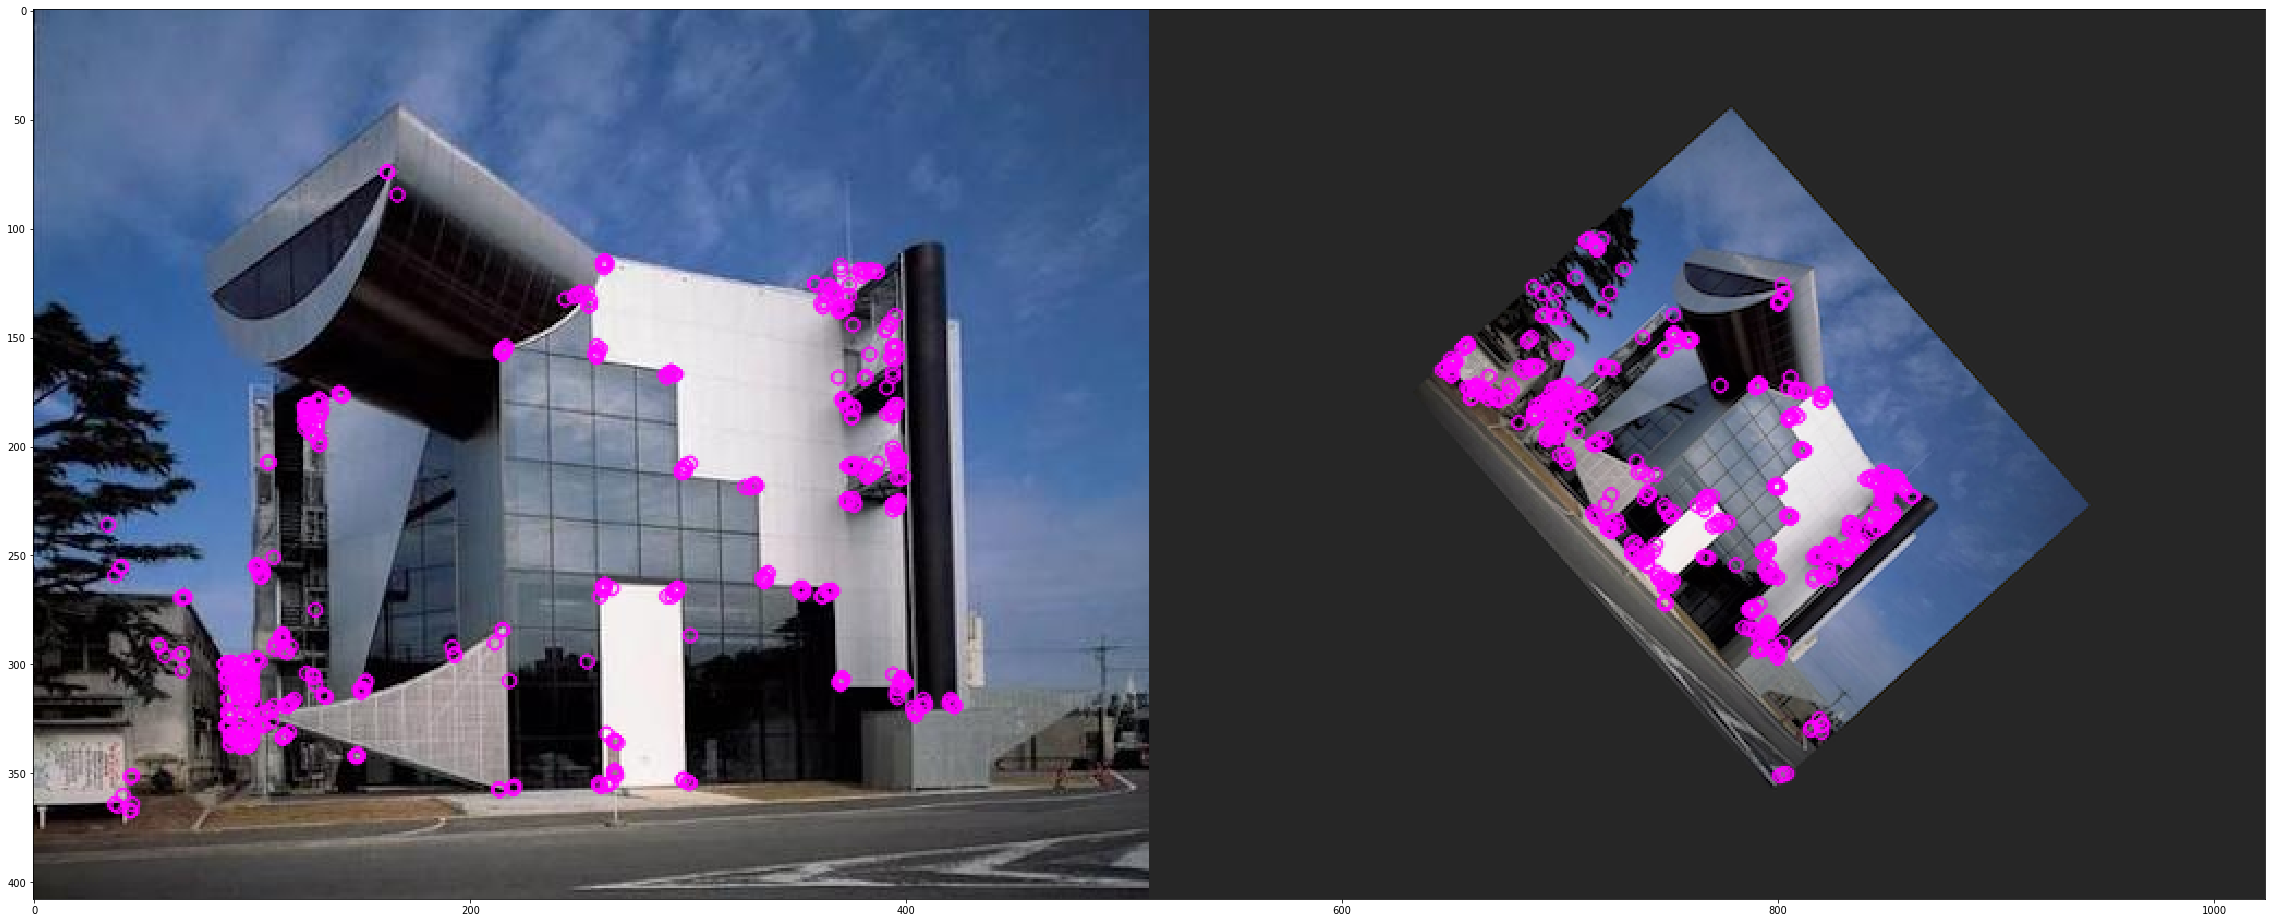

In [14]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
time_start=time.time()
# BFMatcher解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.005244016647338867 s


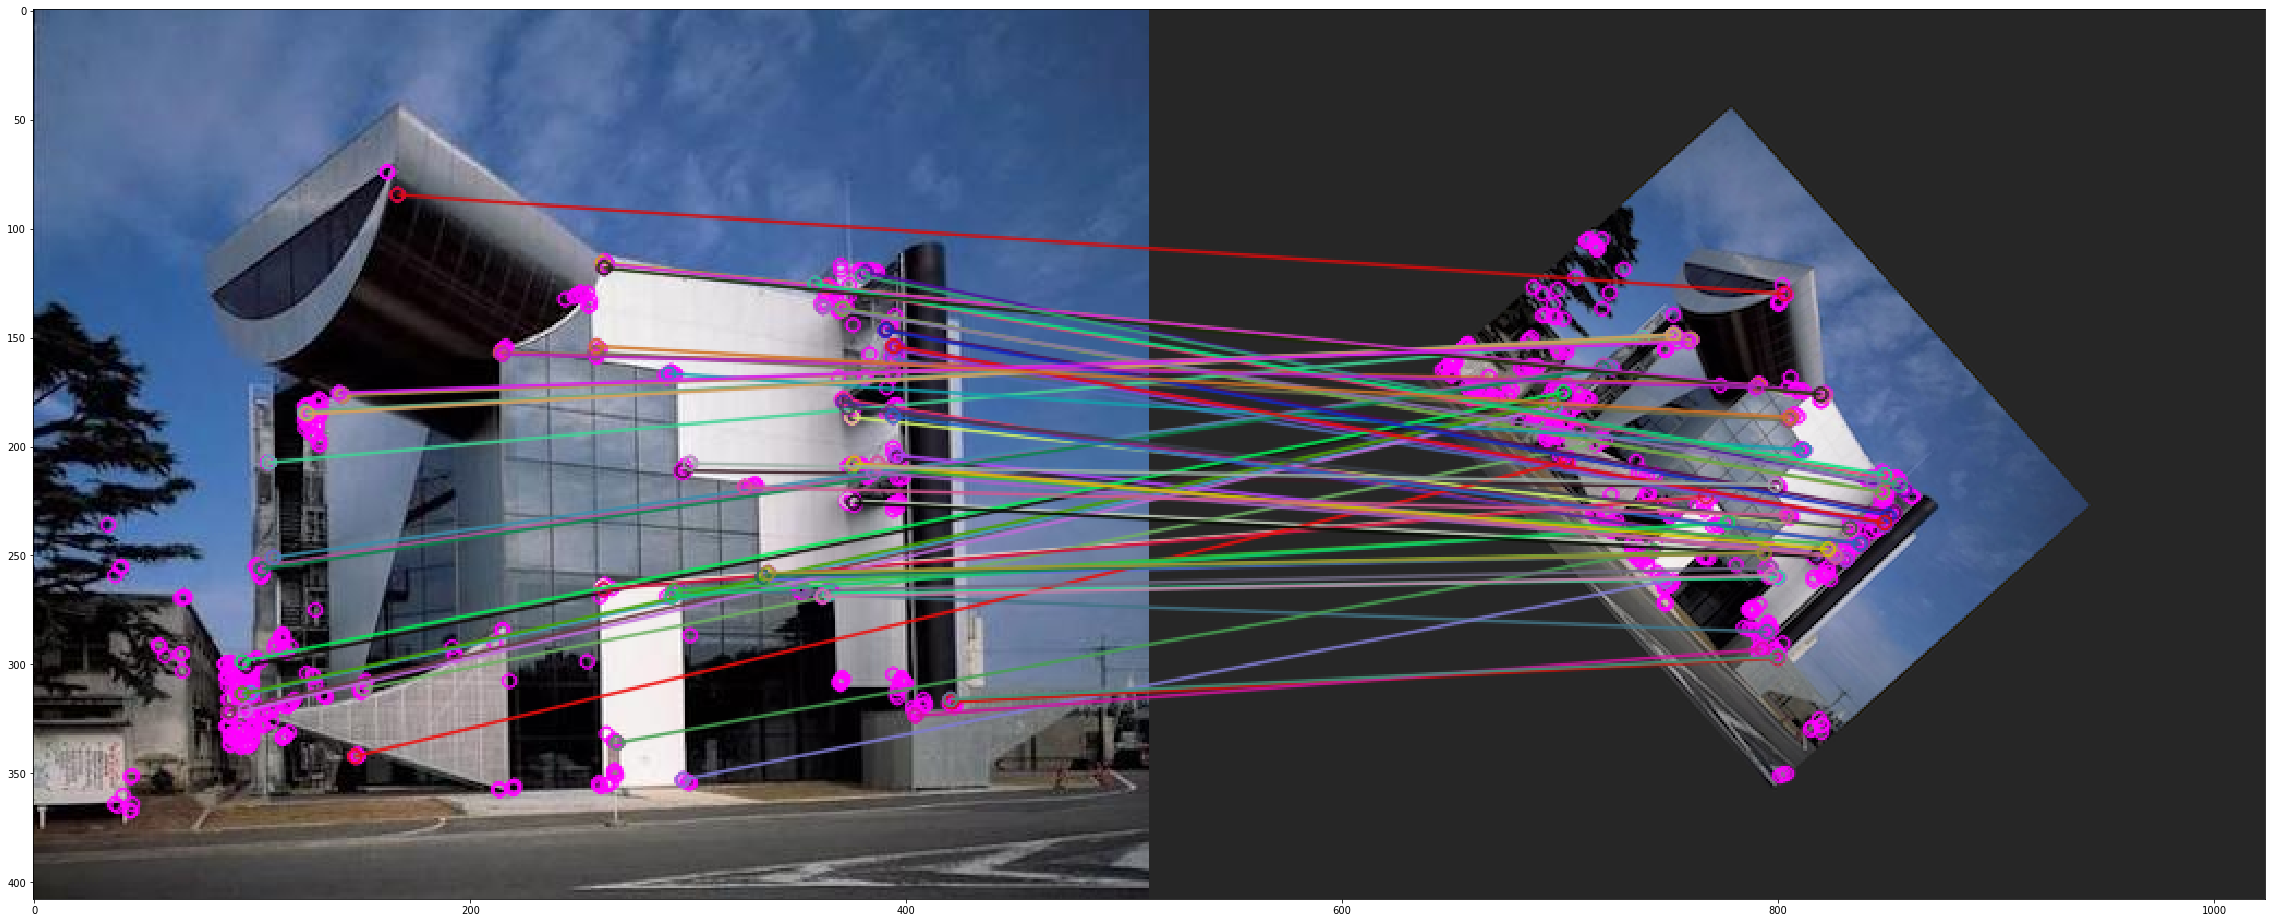

In [16]:
# cv2.imshow("ORB", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()